In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from solvers_by_Artyom import poiseuille_solver, convection_diffusion_solver
from gif_by_Ilya import anim_result

# Steady Plane Poiseuille Flow


The Navier Stokes equation obtained using Conservation of momentum can be written for horizontal components as below

$$
\rho\left(\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}\right)=-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
$$

No vertical motion of fluid is assumed

$$
v=0 
$$

At steady state the velocity profile obtains a form that doesn't vary with time thus time derivatives are equal to zero and 
The horizontal velocity is assumed to have same value throught for all values of x for a particular y at steady state which implies gradient of u w.r.t. x is 0.
Thus,

$$
\frac{\partial u}{\partial t}=0, \frac{\partial u}{\partial x}=0, v \frac{\partial u}{\partial y}=0, \frac{\partial^{2} u}{\partial x^{2}}=0
$$

Thus at steady state,

$$
\frac{\partial p}{\partial x}=\mu\left(\frac{\partial^{2} u}{\partial y^{2}}\right)
$$


In [2]:
mu=5                #viscosity
Pl=500                #Pressure on the left boundary
Pr=200                #Pressure on the right boundary
L=1                #Horizontal length 
press_grad=(Pr-Pl)/L        #Pressure gradient
H=1                 #Vertical height
Nysteps = 50

In [3]:
u = poiseuille_solver(Pr,Pl,H,L,Nysteps,mu)
y = np.linspace(0,H,Nysteps)
analytical_solution = -press_grad/(2*mu)*y*(H-y)

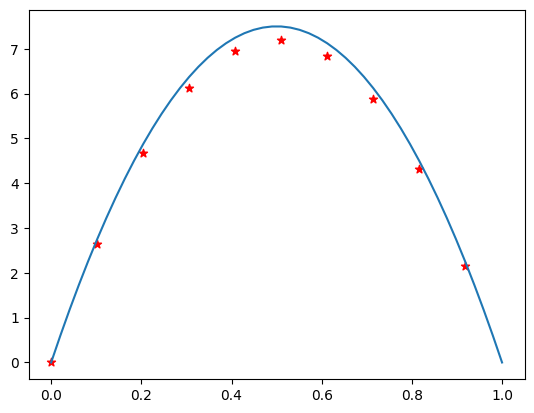

In [4]:
visualize_frequency=5
plt.scatter(y[::visualize_frequency],u[::visualize_frequency],marker='*',c='red')
plt.plot(y,analytical_solution)

In [5]:
init_cond = np.zeros(shape=(Nysteps,Nysteps))
init_cond = init_cond.T
init_cond[-1] = 10
init_cond = init_cond.T

In [6]:
time=0.1

In [7]:
c,timestep=convection_diffusion_solver(init_cond,H,L,time,u,0.01)
c=c[:,1:-1,1:-1]

  2%|▏         | 21/999 [00:00<00:04, 203.88it/s]

100%|██████████| 999/999 [00:04<00:00, 237.32it/s]


(1000, 52, 52)

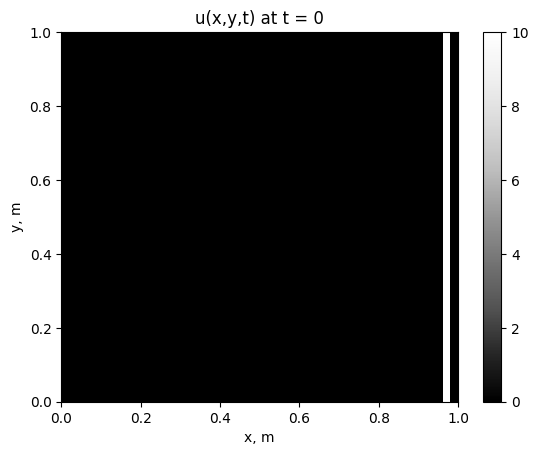

In [8]:
anim_result(c,timestep,L,H, picture=True, showMe=True)